# ENERGY CONSUMPTION VS PRODUCTION CONTRAST PRE - POST PANDEMIC

### 1.Importing libraries and transforming the data:

In [1]:
import energy

In [2]:
report = energy.get_report()

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [4]:
report

[{'State': 'Alaska',
  'Year': 1960,
  'Production': {'Coal': 11263.0},
  'Consumption': {'Commercial': {'Coal': 496.0,
    'Distillate Fuel Oil': 1562.0,
    'Geothermal': 0.0,
    'Hydropower': 0.0,
    'Kerosene': 0.0,
    'Petroleum': 5230.0,
    'Natural Gas': 0.0,
    'Solar': 0.0,
    'Wind': 0.0,
    'Wood': 34.0},
   'Electric Power': {'Coal': 914.0,
    'Distillate Fuel Oil': 554.0,
    'Natural Gas': 0.0,
    'Wood': 0.0},
   'Industrial': {'Coal': 4980.0,
    'Distillate Fuel Oil': 5115.0,
    'Geothermal': 0.0,
    'Hydropower': 0.0,
    'Kerosene': 511.0,
    'Petroleum': 7415.0,
    'Natural Gas': 1856.0,
    'Other Petroleum Products': 0.0,
    'Solar': 0.0,
    'Wind': 0.0,
    'Wood': 1840.0},
   'Refinery': {'Coal': 0.0, 'Distillate Fuel Oil': 0.0, 'Natural Gas': 0.0},
   'Residential': {'Coal': 714.0,
    'Distillate Fuel Oil': 5046.0,
    'Geothermal': 0.0,
    'Kerosene': 0.0,
    'Petroleum': 5137.0,
    'Natural Gas': 176.0,
    'Wood': 1806.0},
   'Transportati

In [5]:
#importing the csv files
energy_df = pd.read_csv('energy.csv')
df=pd.DataFrame(energy_df)

In [6]:
df

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas
0,Alaska,1960,11263.0,496.0,1562.0,0.0,0.0,0.0,5230.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
1,Alaska,1961,11497.0,496.0,1646.0,0.0,0.0,0.0,5304.0,122.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2,Alaska,1962,13588.0,593.0,1732.0,0.0,0.0,0.0,5251.0,19.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
3,Alaska,1963,13307.0,393.0,1868.0,0.0,0.0,0.0,5475.0,1632.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,Alaska,1964,11622.0,306.0,2020.0,0.0,0.0,0.0,7242.0,1944.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Wyoming,2015,6538240.0,174.0,1547.0,528.0,0.0,3.0,5246.0,13716.0,...,2.23,14.62,13.48,16.25,4.78,15.53,0.0,18.91,19.47,10.31
3056,Wyoming,2016,5169939.0,149.0,1665.0,528.0,0.0,2.0,4717.0,14423.0,...,2.14,11.76,10.75,13.48,3.69,13.05,0.0,16.35,17.10,13.83
3057,Wyoming,2017,5516757.0,285.0,1545.0,528.0,0.0,1.0,3087.0,14812.0,...,2.28,14.51,13.44,15.40,4.04,16.26,0.0,19.19,19.62,9.22
3058,Wyoming,2018,5315953.0,187.0,1007.0,528.0,0.0,1.0,2429.0,14644.0,...,2.35,18.16,16.79,18.60,3.69,20.66,0.0,22.79,22.94,8.20


### 2.Exploratory Data Analysis

In [7]:
df.dtypes

State                                          object
Year                                            int64
Production.Coal                               float64
Consumption.Commercial.Coal                   float64
Consumption.Commercial.Distillate Fuel Oil    float64
                                               ...   
Price.Industrial.Other Petroleum Products     float64
Price.Transportation.Coal                     float64
Price.Transportation.Distillate Fuel Oil      float64
Price.Transportation.Petroleum                float64
Price.Transportation.Natural Gas              float64
Length: 84, dtype: object

In [8]:
df.columns

Index(['State', 'Year', 'Production.Coal', 'Consumption.Commercial.Coal',
       'Consumption.Commercial.Distillate Fuel Oil',
       'Consumption.Commercial.Geothermal',
       'Consumption.Commercial.Hydropower', 'Consumption.Commercial.Kerosene',
       'Consumption.Commercial.Petroleum',
       'Consumption.Commercial.Natural Gas', 'Consumption.Commercial.Solar',
       'Consumption.Commercial.Wind', 'Consumption.Commercial.Wood',
       'Consumption.Electric Power.Coal',
       'Consumption.Electric Power.Distillate Fuel Oil',
       'Consumption.Electric Power.Natural Gas',
       'Consumption.Electric Power.Wood', 'Consumption.Industrial.Coal',
       'Consumption.Industrial.Distillate Fuel Oil',
       'Consumption.Industrial.Geothermal',
       'Consumption.Industrial.Hydropower', 'Consumption.Industrial.Kerosene',
       'Consumption.Industrial.Petroleum',
       'Consumption.Industrial.Natural Gas',
       'Consumption.Industrial.Other Petroleum Products',
       'Consumptio

In [9]:
df.shape

(3060, 84)

In [10]:
df.head()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas
0,Alaska,1960,11263.0,496.0,1562.0,0.0,0.0,0.0,5230.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaska,1961,11497.0,496.0,1646.0,0.0,0.0,0.0,5304.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alaska,1962,13588.0,593.0,1732.0,0.0,0.0,0.0,5251.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alaska,1963,13307.0,393.0,1868.0,0.0,0.0,0.0,5475.0,1632.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alaska,1964,11622.0,306.0,2020.0,0.0,0.0,0.0,7242.0,1944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.tail()

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas
3055,Wyoming,2015,6538240.0,174.0,1547.0,528.0,0.0,3.0,5246.0,13716.0,...,2.23,14.62,13.48,16.25,4.78,15.53,0.0,18.91,19.47,10.31
3056,Wyoming,2016,5169939.0,149.0,1665.0,528.0,0.0,2.0,4717.0,14423.0,...,2.14,11.76,10.75,13.48,3.69,13.05,0.0,16.35,17.10,13.83
3057,Wyoming,2017,5516757.0,285.0,1545.0,528.0,0.0,1.0,3087.0,14812.0,...,2.28,14.51,13.44,15.40,4.04,16.26,0.0,19.19,19.62,9.22
3058,Wyoming,2018,5315953.0,187.0,1007.0,528.0,0.0,1.0,2429.0,14644.0,...,2.35,18.16,16.79,18.60,3.69,20.66,0.0,22.79,22.94,8.20
3059,Wyoming,2019,4828513.0,147.0,1040.0,528.0,0.0,0.0,3418.0,13963.0,...,2.42,16.28,15.68,17.48,3.64,19.05,0.0,21.53,21.78,10.75


In [12]:
df.describe()

,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,Consumption.Commercial.Solar,...,Price.Industrial.Coal,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas
count,3060.000000,3.060000e+03,3060.000000,3060.000000,3060.000000,3060.00000,3060.000000,3060.000000,3060.000000,3060.000000,...,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,1989.500000,3.607220e+05,2672.989869,9838.225490,120.999673,10.03268,634.295425,20644.701634,53358.218301,189.756536,...,1.561552,7.462199,7.557873,7.315758,3.675709,10.010373,0.114784,9.685905,9.959902,3.506121
std,17.320933,9.140135e+05,6234.074605,15813.510586,276.555677,79.65197,2476.141756,38142.721118,61551.706579,1313.280637,...,1.281751,7.302796,7.562019,6.834110,3.319880,9.824753,0.345070,8.565106,8.245061,4.736515
min,1960.000000,0.000000e+00,0.000000,53.000000,0.000000,0.00000,0.000000,612.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1974.750000,0.000000e+00,23.000000,2126.250000,0.000000,0.00000,20.750000,4744.000000,14201.750000,0.000000,...,0.440000,2.145000,1.867500,2.180000,0.670000,0.000000,0.000000,2.690000,3.820000,0.000000
50%,1989.500000,0.000000e+00,456.500000,4862.500000,0.000000,0.00000,118.500000,10023.500000,31621.000000,0.000000,...,1.580000,5.320000,5.280000,5.550000,3.390000,8.935000,0.000000,8.000000,8.470000,0.000000
75%,2004.250000,2.808198e+05,2916.000000,10500.250000,57.250000,0.00000,502.250000,20220.000000,61934.250000,2.000000,...,2.110000,11.272500,10.282500,10.112500,5.280000,16.230000,0.000000,15.237500,14.922500,6.252500
max,2019.000000,8.087435e+06,89986.000000,123016.000000,4717.000000,1678.00000,66791.000000,416886.000000,377693.000000,33643.000000,...,6.520000,29.580000,30.120000,28.260000,29.530000,35.560000,2.650000,35.690000,31.230000,41.670000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 84 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   State                                            3060 non-null   object 
 1   Year                                             3060 non-null   int64  
 2   Production.Coal                                  3060 non-null   float64
 3   Consumption.Commercial.Coal                      3060 non-null   float64
 4   Consumption.Commercial.Distillate Fuel Oil       3060 non-null   float64
 5   Consumption.Commercial.Geothermal                3060 non-null   float64
 6   Consumption.Commercial.Hydropower                3060 non-null   float64
 7   Consumption.Commercial.Kerosene                  3060 non-null   float64
 8   Consumption.Commercial.Petroleum                 3060 non-null   float64
 9   Consumption.Commercial.Natural

### 3. Narrowing the Analysis:

In [14]:
# SUM OF ELECTRIC CONSUMPTION
df['ep_total_cons'] = df['Consumption.Electric Power.Coal'] + df['Consumption.Electric Power.Distillate Fuel Oil'] + df['Consumption.Electric Power.Natural Gas']

In [15]:
df['ep_total_cons']

0         1468.0
1         1823.0
2         2238.0
3         3416.0
4         5353.0
          ...   
3055    459374.0
3056    427103.0
3057    428506.0
3058    426572.0
3059    383122.0
Name: ep_total_cons, Length: 3060, dtype: float64

In [16]:
df

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,...,Price.Industrial.Distillate Fuel Oil,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas,ep_total_cons
0,Alaska,1960,11263.0,496.0,1562.0,0.0,0.0,0.0,5230.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1468.0
1,Alaska,1961,11497.0,496.0,1646.0,0.0,0.0,0.0,5304.0,122.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1823.0
2,Alaska,1962,13588.0,593.0,1732.0,0.0,0.0,0.0,5251.0,19.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2238.0
3,Alaska,1963,13307.0,393.0,1868.0,0.0,0.0,0.0,5475.0,1632.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3416.0
4,Alaska,1964,11622.0,306.0,2020.0,0.0,0.0,0.0,7242.0,1944.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5353.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Wyoming,2015,6538240.0,174.0,1547.0,528.0,0.0,3.0,5246.0,13716.0,...,14.62,13.48,16.25,4.78,15.53,0.0,18.91,19.47,10.31,459374.0
3056,Wyoming,2016,5169939.0,149.0,1665.0,528.0,0.0,2.0,4717.0,14423.0,...,11.76,10.75,13.48,3.69,13.05,0.0,16.35,17.10,13.83,427103.0
3057,Wyoming,2017,5516757.0,285.0,1545.0,528.0,0.0,1.0,3087.0,14812.0,...,14.51,13.44,15.40,4.04,16.26,0.0,19.19,19.62,9.22,428506.0
3058,Wyoming,2018,5315953.0,187.0,1007.0,528.0,0.0,1.0,2429.0,14644.0,...,18.16,16.79,18.60,3.69,20.66,0.0,22.79,22.94,8.20,426572.0


In [17]:
# SUM OF ELECTRIC EXPENDITURE
df['ep_total_exp'] = df['Expenditure.Electric Power.Coal'] + df['Expenditure.Electric Power.Distillate Fuel Oil'] + df['Consumption.Electric Power.Natural Gas']

In [18]:
df

,State,Year,Production.Coal,Consumption.Commercial.Coal,Consumption.Commercial.Distillate Fuel Oil,Consumption.Commercial.Geothermal,Consumption.Commercial.Hydropower,Consumption.Commercial.Kerosene,Consumption.Commercial.Petroleum,Consumption.Commercial.Natural Gas,...,Price.Industrial.Kerosene,Price.Industrial.Petroleum,Price.Industrial.Natural Gas,Price.Industrial.Other Petroleum Products,Price.Transportation.Coal,Price.Transportation.Distillate Fuel Oil,Price.Transportation.Petroleum,Price.Transportation.Natural Gas,ep_total_cons,ep_total_exp
0,Alaska,1960,11263.0,496.0,1562.0,0.0,0.0,0.0,5230.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1468.0,0.0
1,Alaska,1961,11497.0,496.0,1646.0,0.0,0.0,0.0,5304.0,122.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1823.0,0.0
2,Alaska,1962,13588.0,593.0,1732.0,0.0,0.0,0.0,5251.0,19.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2238.0,0.0
3,Alaska,1963,13307.0,393.0,1868.0,0.0,0.0,0.0,5475.0,1632.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3416.0,975.0
4,Alaska,1964,11622.0,306.0,2020.0,0.0,0.0,0.0,7242.0,1944.0,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,5353.0,1614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,Wyoming,2015,6538240.0,174.0,1547.0,528.0,0.0,3.0,5246.0,13716.0,...,13.48,16.25,4.78,15.53,0.0,18.91,19.47,10.31,459374.0,2035.0
3056,Wyoming,2016,5169939.0,149.0,1665.0,528.0,0.0,2.0,4717.0,14423.0,...,10.75,13.48,3.69,13.05,0.0,16.35,17.10,13.83,427103.0,2303.3
3057,Wyoming,2017,5516757.0,285.0,1545.0,528.0,0.0,1.0,3087.0,14812.0,...,13.44,15.40,4.04,16.26,0.0,19.19,19.62,9.22,428506.0,2087.3
3058,Wyoming,2018,5315953.0,187.0,1007.0,528.0,0.0,1.0,2429.0,14644.0,...,16.79,18.60,3.69,20.66,0.0,22.79,22.94,8.20,426572.0,2686.8


## SAMPLES

* California Electric Power CONSUMPTION and EXPENDITURE

In [19]:
df_cali=df.loc[df.State=='California',['Year','State','ep_total_cons','ep_total_exp']]

In [20]:
df_cali

,Year,State,ep_total_cons,ep_total_exp
240,1960,California,334997.0,334297.0
241,1961,California,411121.0,410443.0
242,1962,California,411138.0,410638.0
243,1963,California,460477.0,460019.0
244,1964,California,556106.0,555604.0
245,1965,California,529154.0,528668.0
246,1966,California,640193.0,639628.0
247,1967,California,622238.0,621709.0
248,1968,California,732087.0,731533.0
249,1969,California,630800.0,630224.0


* Florida Electric Power CONSUMPTION and EXPENDITURE

In [21]:
df_flori=df.loc[df.State=='Florida',['Year','State','ep_total_cons','ep_total_exp']]

In [22]:
df_flori

,Year,State,ep_total_cons,ep_total_exp
540,1960,Florida,119902.0,91616.0
541,1961,Florida,125058.0,87575.0
542,1962,Florida,133110.0,92004.0
543,1963,Florida,142757.0,97873.0
544,1964,Florida,144941.0,96377.0
545,1965,Florida,147671.0,90220.0
546,1966,Florida,174171.0,101543.0
547,1967,Florida,210673.0,112024.0
548,1968,Florida,260516.0,154684.0
549,1969,Florida,295476.0,188437.0


* New York Electric Power CONSUMPTION and EXPENDITURE

In [23]:
df_NY=df.loc[df.State=='New York',['Year','State','ep_total_cons','ep_total_exp']]

In [24]:
df_NY

,Year,State,ep_total_cons,ep_total_exp
2040,1960,New York,389065.0,59843.0
2041,1961,New York,363815.0,63095.0
2042,1962,New York,362050.0,71293.0
2043,1963,New York,389925.0,84315.0
2044,1964,New York,435375.0,79501.0
2045,1965,New York,445532.0,76118.0
2046,1966,New York,428370.0,73178.0
2047,1967,New York,453448.0,86327.0
2048,1968,New York,467003.0,104282.0
2049,1969,New York,453493.0,109513.0


* Pennsylvania Electric Power CONSUMPTION and EXPENDITURE

In [25]:
df_Penn=df.loc[df.State=='Pennsylvania',['Year','State','ep_total_cons','ep_total_exp']]

In [26]:
df_Penn

,Year,State,ep_total_cons,ep_total_exp
2280,1960,Pennsylvania,432324.0,6196.0
2281,1961,Pennsylvania,439500.0,2712.0
2282,1962,Pennsylvania,467445.0,2002.0
2283,1963,Pennsylvania,490855.0,4273.0
2284,1964,Pennsylvania,540693.0,4922.0
2285,1965,Pennsylvania,563285.0,1267.0
2286,1966,Pennsylvania,586379.0,1249.0
2287,1967,Pennsylvania,598872.0,2480.0
2288,1968,Pennsylvania,644052.0,4499.0
2289,1969,Pennsylvania,656990.0,7409.0


* Texas Electric Power CONSUMPTION and EXPENDITURE

In [27]:
df_Texas=df.loc[df.State=='Texas',['Year','State','ep_total_cons','ep_total_exp']]

In [28]:
df_Texas

,Year,State,ep_total_cons,ep_total_exp
2580,1960,Texas,421672.0,421566.0
2581,1961,Texas,434874.0,434775.0
2582,1962,Texas,509556.0,509373.0
2583,1963,Texas,574773.0,574622.0
2584,1964,Texas,625654.0,625564.0
2585,1965,Texas,663289.0,663206.0
2586,1966,Texas,732411.0,732301.0
2587,1967,Texas,808316.0,808230.0
2588,1968,Texas,884095.0,883973.0
2589,1969,Texas,1010593.0,1010430.0


# concatenated

In [29]:
frames = [df_cali, df_flori, df_NY, df_Penn, df_Texas]

In [30]:
frames

[     Year       State  ep_total_cons  ep_total_exp
 240  1960  California       334997.0      334297.0
 241  1961  California       411121.0      410443.0
 242  1962  California       411138.0      410638.0
 243  1963  California       460477.0      460019.0
 244  1964  California       556106.0      555604.0
 245  1965  California       529154.0      528668.0
 246  1966  California       640193.0      639628.0
 247  1967  California       622238.0      621709.0
 248  1968  California       732087.0      731533.0
 249  1969  California       630800.0      630224.0
 250  1970  California       671250.0      670629.2
 251  1971  California       594534.0      593220.8
 252  1972  California       643266.0      643349.9
 253  1973  California       484482.0      483769.8
 254  1974  California       312706.0      312294.8
 255  1975  California       292725.0      291862.0
 256  1976  California       314689.0      313008.5
 257  1977  California       381069.0      380237.2
 258  1978  

In [31]:
result = pd.concat(frames)

In [32]:
result

,Year,State,ep_total_cons,ep_total_exp
240,1960,California,334997.0,334297.0
241,1961,California,411121.0,410443.0
242,1962,California,411138.0,410638.0
243,1963,California,460477.0,460019.0
244,1964,California,556106.0,555604.0
...,...,...,...,...
2635,2015,Texas,2996744.0,1678337.9
2636,2016,Texas,2890160.0,1582353.5
2637,2017,Texas,2851894.0,1414161.5
2638,2018,Texas,2868565.0,1691451.8


## Barplots

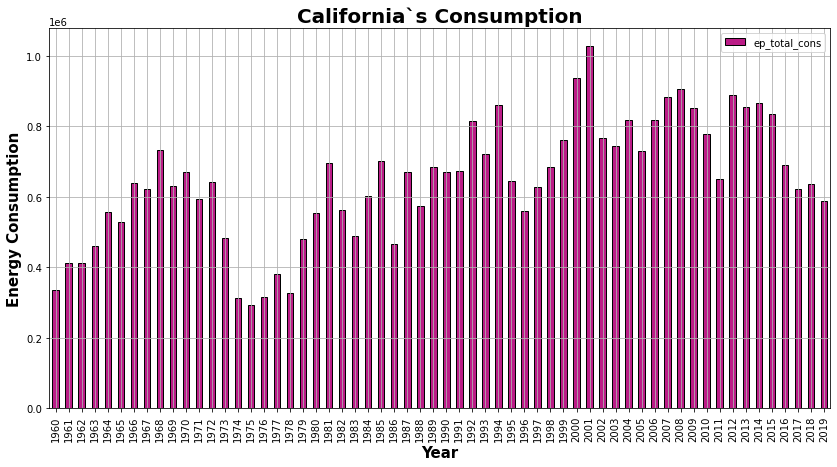

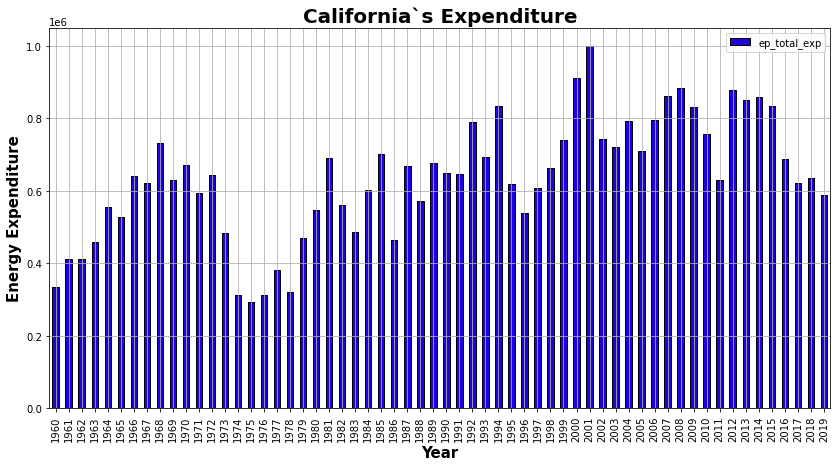

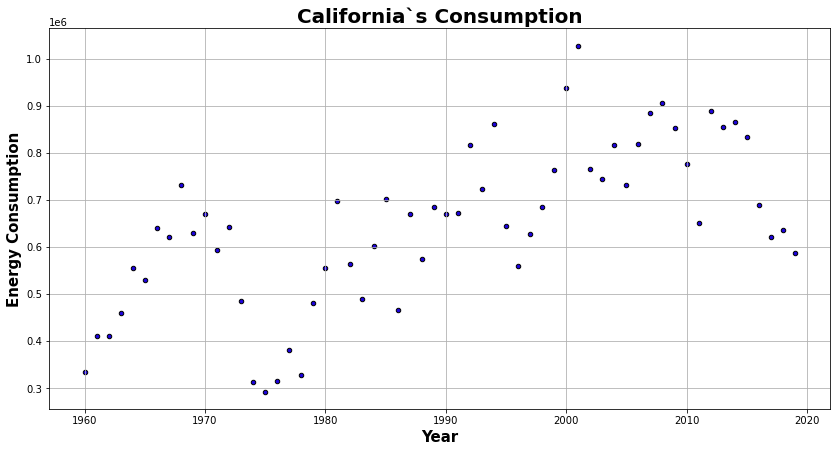

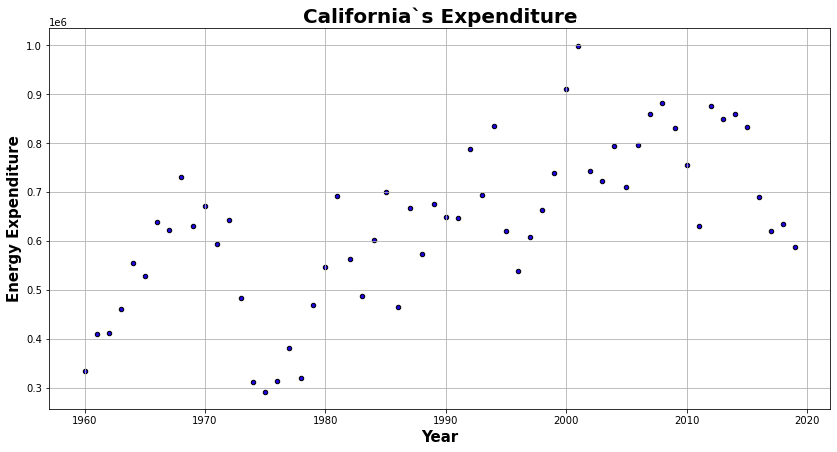

In [33]:
dfnew = pd.DataFrame(result)



# California Consumption
acc= dfnew.loc[dfnew.State=='California'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.7,0,0.47,0.89), width=0.5, edgecolor='black')
acc.legend(bbox_to_anchor=(1, 1))
acc.set_xlabel('Year',fontsize=15, fontweight='bold')
acc.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
acc.set_title(f'California`s Consumption', fontsize=20, fontweight='bold')
plt.grid()

# California Expenditure
aec= dfnew.loc[dfnew.State=='California'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), width=0.5, edgecolor='black')
aec.legend(bbox_to_anchor=(1, 1))
aec.set_xlabel('Year',fontsize=15, fontweight='bold')
aec.set_ylabel('Energy Expenditure', fontsize=15, fontweight='bold')
aec.set_title(f'California`s Expenditure',fontsize=20, fontweight='bold')
plt.grid()



#SCATTERPLOT consumption
acc= dfnew.loc[dfnew.State=='California'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
acc.set_xlabel('Year',fontsize=15, fontweight='bold')
acc.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
acc.set_title(f'California`s Consumption', fontsize=20, fontweight='bold')
plt.grid()

#SCATTERPLOT Expenditure
aec= dfnew.loc[dfnew.State=='California'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
aec.set_xlabel('Year',fontsize=15, fontweight='bold')
aec.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aec.set_title(f'California`s Expenditure', fontsize=20, fontweight='bold')
plt.grid()

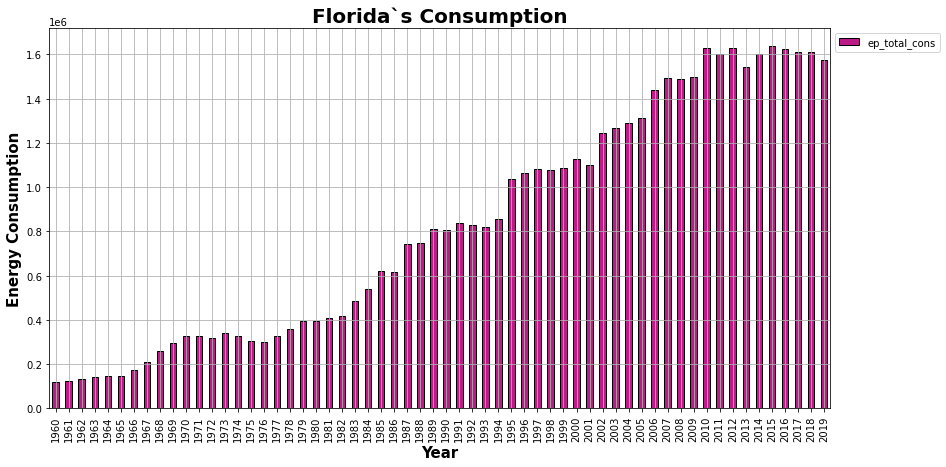

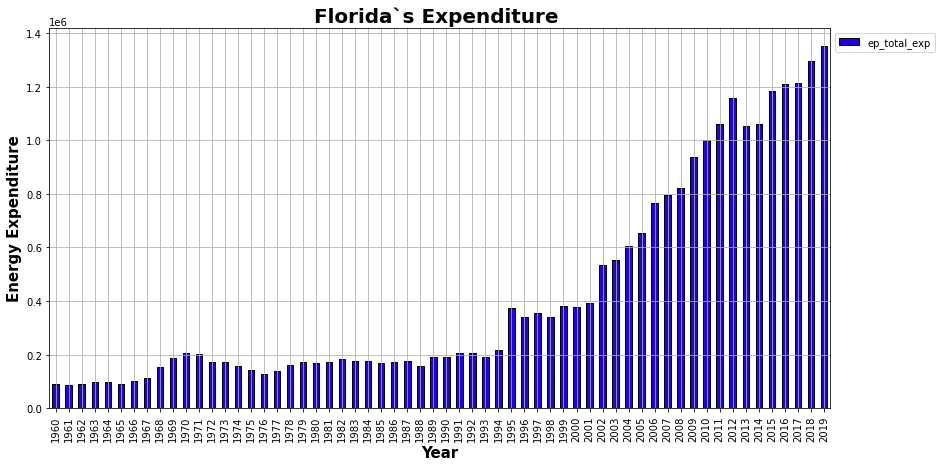

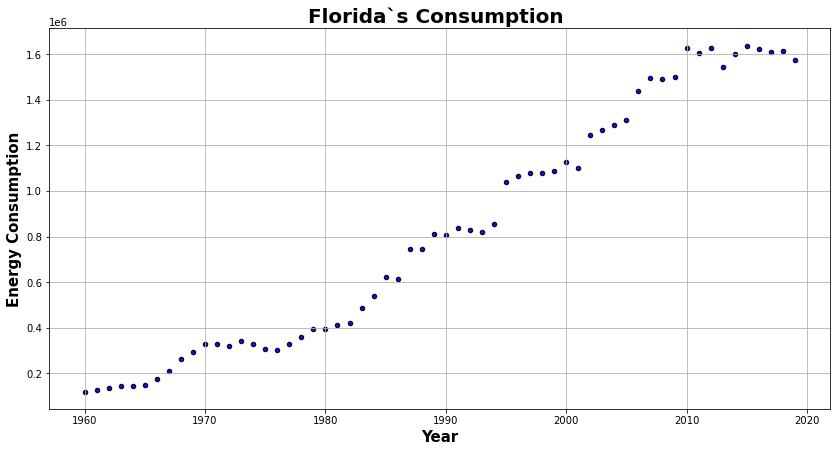

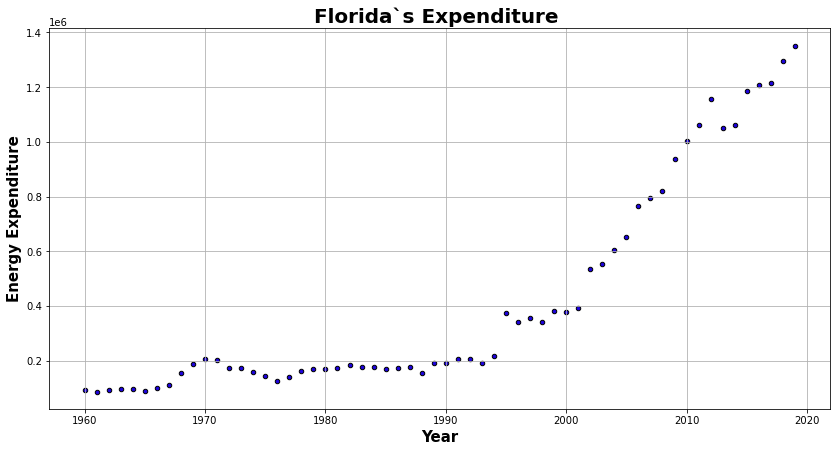

In [34]:

# Florida Consumption
acf= dfnew.loc[dfnew.State=='Florida'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.7,0,0.47,0.89), width=0.5, edgecolor='black')
acf.legend(bbox_to_anchor=(1, 1))
acf.set_xlabel('Year',fontsize=15, fontweight='bold')
acf.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
acf.set_title(f'Florida`s Consumption', fontsize=20, fontweight='bold')
plt.grid()


# Florida Expenditure
aef= dfnew.loc[dfnew.State=='Florida'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), width=0.5, edgecolor='black')
aef.legend(bbox_to_anchor=(1, 1))
aef.set_xlabel('Year',fontsize=15, fontweight='bold')
aef.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aef.set_title(f'Florida`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()



#SCATTERPLOT consumption
act= dfnew.loc[dfnew.State=='Florida'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
act.set_xlabel('Year',fontsize=15, fontweight='bold')
act.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
act.set_title(f'Florida`s Consumption ', fontsize=20, fontweight='bold')
plt.grid()

#SCATTERPLOT Expenditure
aet= dfnew.loc[dfnew.State=='Florida'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
aet.set_xlabel('Year',fontsize=15, fontweight='bold')
aet.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aet.set_title(f'Florida`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()


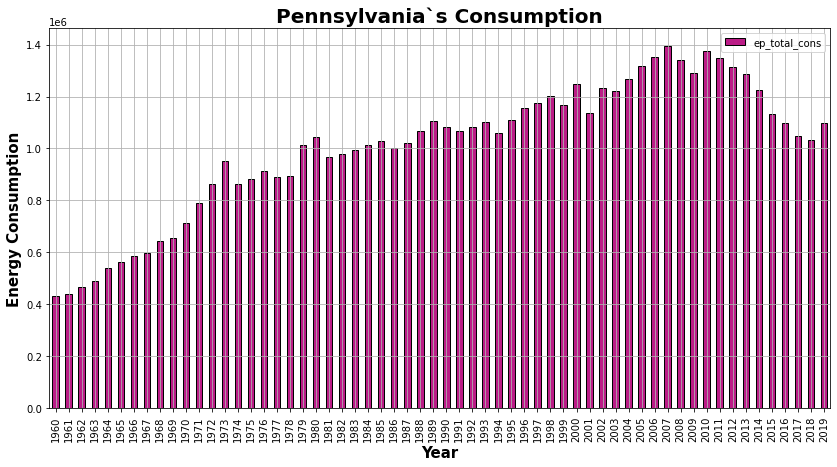

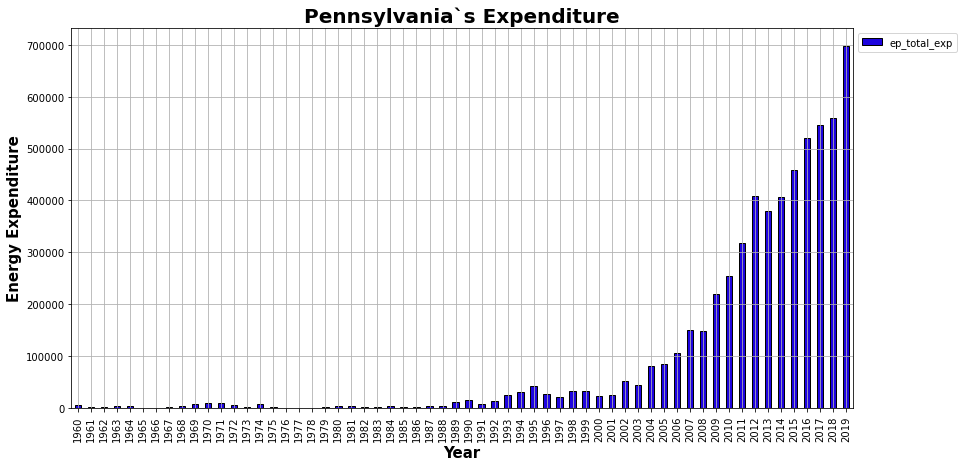

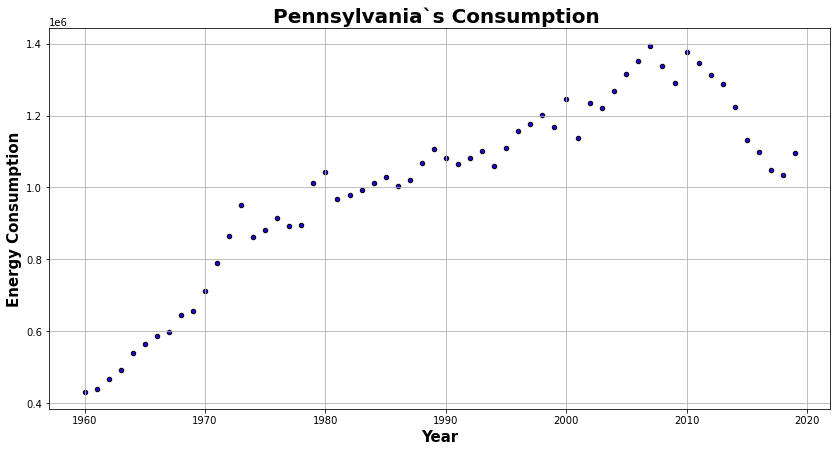

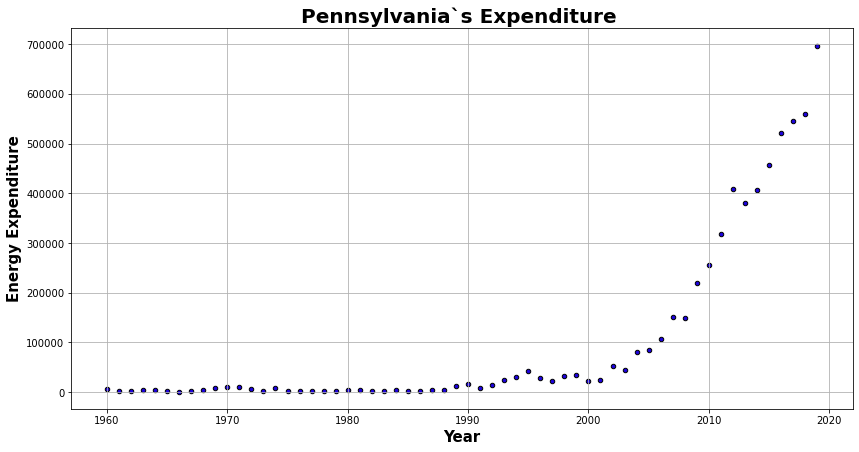

In [35]:
# Pennsylvania Consumption
acp= dfnew.loc[dfnew.State=='Pennsylvania'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.7,0,0.47,0.89), width=0.5, edgecolor='black')
acp.legend(bbox_to_anchor=(1, 1))
acp.set_xlabel('Year',fontsize=15, fontweight='bold')
acp.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
acp.set_title(f'Pennsylvania`s Consumption', fontsize=20, fontweight='bold')
plt.grid()

# Pennsylvania Expenditure
aep= dfnew.loc[dfnew.State=='Pennsylvania'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_exp',
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), width=0.5, edgecolor='black')
aep.legend(bbox_to_anchor=(1, 1))
aep.set_xlabel('Year',fontsize=15, fontweight='bold')
aep.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aep.set_title(f'Pennsylvania`s Expenditure',fontsize=20, fontweight='bold')
plt.grid()



#SCATTERPLOT consumption
act= dfnew.loc[dfnew.State=='Pennsylvania'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
act.set_xlabel('Year',fontsize=15, fontweight='bold')
act.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
act.set_title(f'Pennsylvania`s Consumption ', fontsize=20, fontweight='bold')
plt.grid()

#SCATTERPLOT Expenditure
aet= dfnew.loc[dfnew.State=='Pennsylvania'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
aet.set_xlabel('Year',fontsize=15, fontweight='bold')
aet.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aet.set_title(f'Pennsylvania`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()



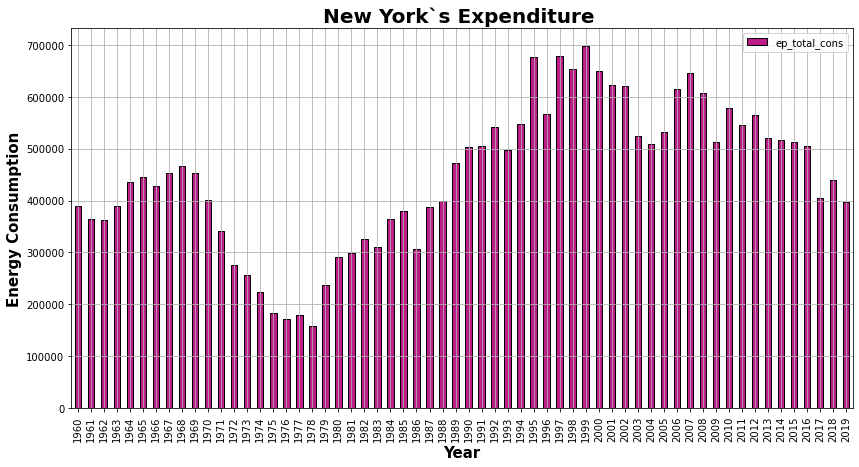

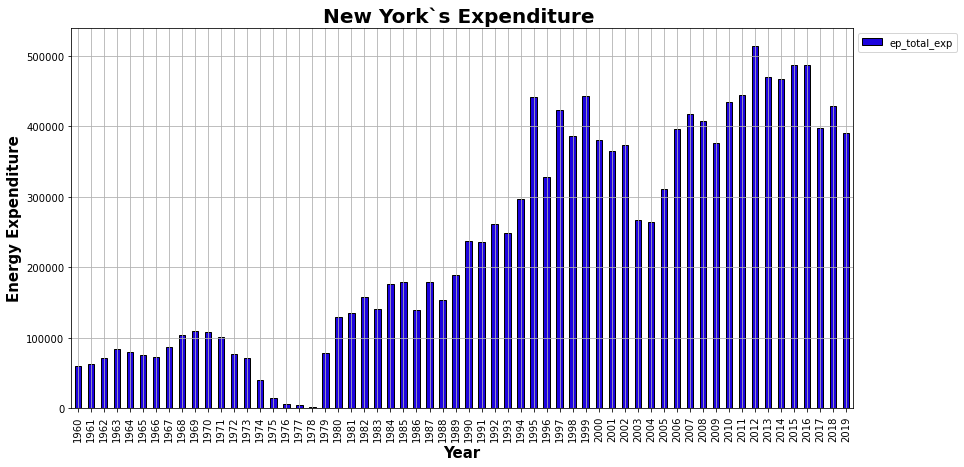

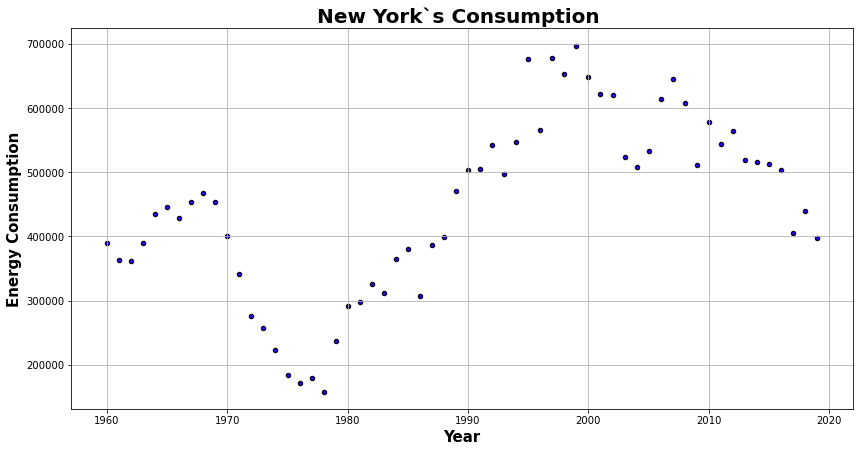

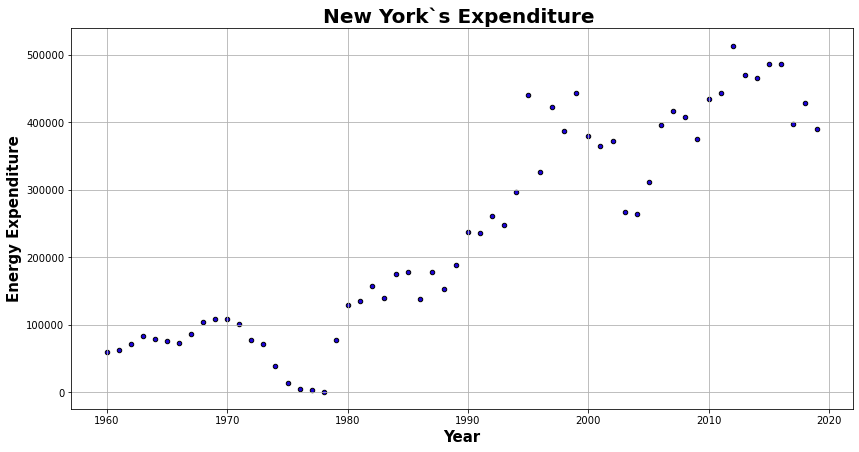

In [36]:
## New York Consumption
acn= dfnew.loc[dfnew.State=='New York'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.7,0,0.47,0.89), width=0.5, edgecolor='black')
acn.legend(bbox_to_anchor=(1, 1))
acn.set_xlabel('Year',fontsize=15, fontweight='bold')
acn.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
acn.set_title(f'New York`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()


# New York Expenditure
aen= dfnew.loc[dfnew.State=='New York'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), width=0.5, edgecolor='black')
aen.legend(bbox_to_anchor=(1, 1))
aen.set_xlabel('Year',fontsize=15, fontweight='bold')
aen.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aen.set_title(f'New York`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()


#SCATTERPLOT consumption
act= dfnew.loc[dfnew.State=='New York'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
act.set_xlabel('Year',fontsize=15, fontweight='bold')
act.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
act.set_title(f'New York`s Consumption ', fontsize=20, fontweight='bold')
plt.grid()

#SCATTERPLOT Expenditure
aet= dfnew.loc[dfnew.State=='New York'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
aet.set_xlabel('Year',fontsize=15, fontweight='bold')
aet.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aet.set_title(f'New York`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()


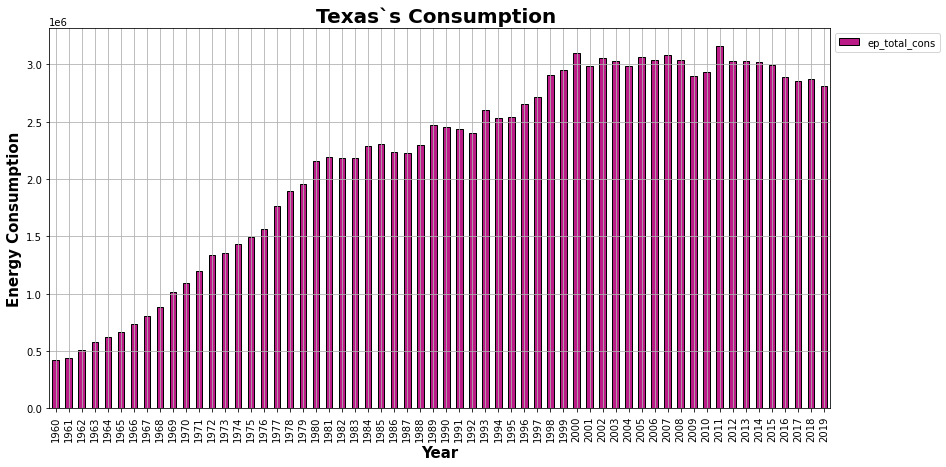

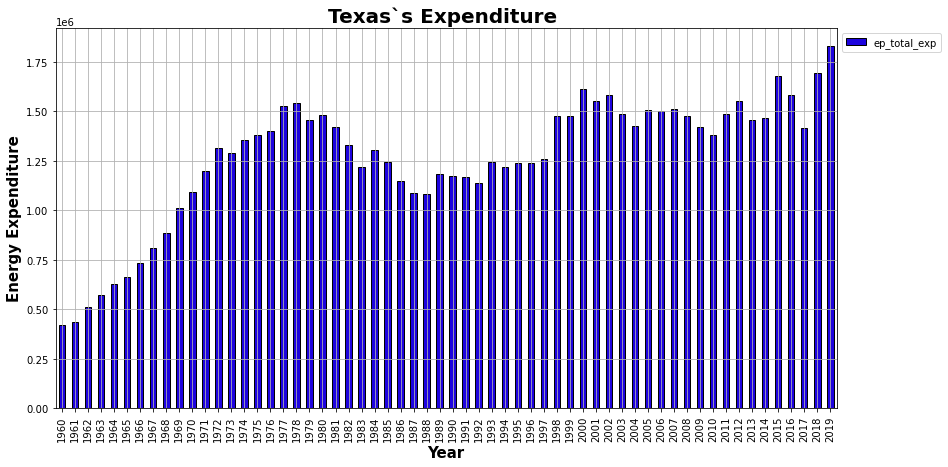

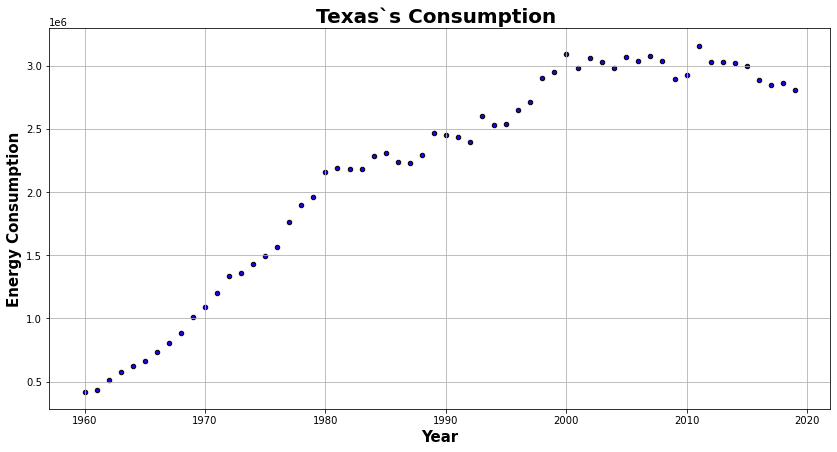

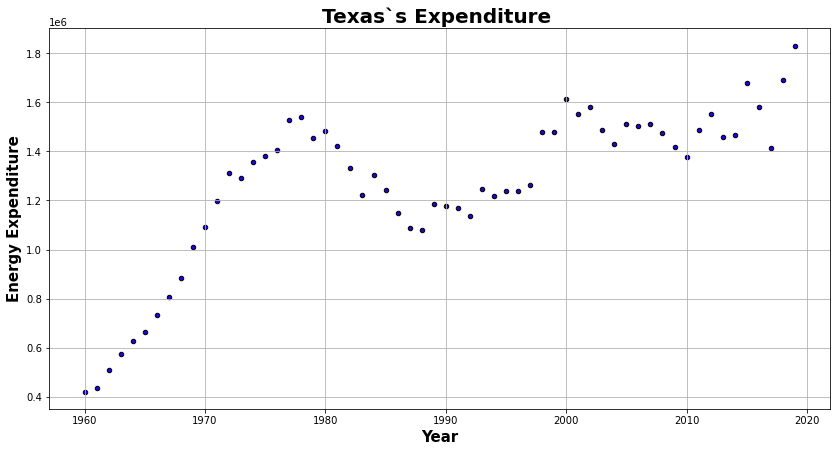

In [37]:
# Texas Consumption
act= dfnew.loc[dfnew.State=='Texas'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.7,0,0.47,0.89), width=0.5, edgecolor='black')
act.legend(bbox_to_anchor=(1, 1))
act.set_xlabel('Year',fontsize=15, fontweight='bold')
act.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
act.set_title(f'Texas`s Consumption ', fontsize=20, fontweight='bold')
plt.grid()


# Texas Expenditure
aet= dfnew.loc[dfnew.State=='Texas'].plot(kind='bar', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), width=0.5, edgecolor='black')
aet.legend(bbox_to_anchor=(1, 1))
aet.set_xlabel('Year',fontsize=15, fontweight='bold')
aet.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aet.set_title(f'Texas`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()



#SCATTERPLOT consumption
act= dfnew.loc[dfnew.State=='Texas'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_cons', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
act.set_xlabel('Year',fontsize=15, fontweight='bold')
act.set_ylabel('Energy Consumption',fontsize=15, fontweight='bold')
act.set_title(f'Texas`s Consumption ', fontsize=20, fontweight='bold')
plt.grid()

#SCATTERPLOT Expenditure
aet= dfnew.loc[dfnew.State=='Texas'].plot(kind='scatter', 
                       x='Year', 
                       y='ep_total_exp', 
                       figsize=(14,7),
                       color=(0.1,0,0.87,0.99), edgecolor='black')
aet.set_xlabel('Year',fontsize=15, fontweight='bold')
aet.set_ylabel('Energy Expenditure',fontsize=15, fontweight='bold')
aet.set_title(f'Texas`s Expenditure ', fontsize=20, fontweight='bold')
plt.grid()

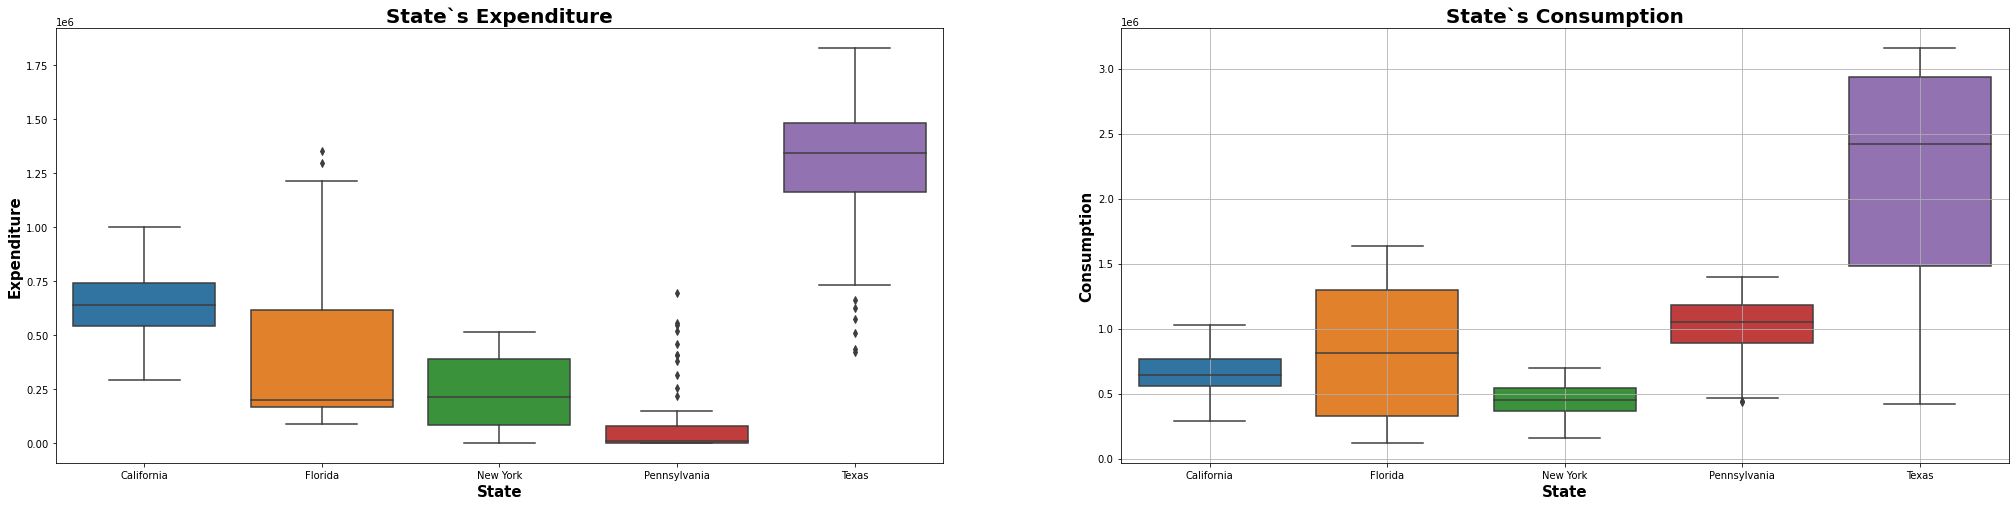

In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(35,8))

sns.boxplot(x="State", y="ep_total_exp", data=dfnew, ax=axes[0])
axes[0].set_xlabel('State',fontsize=15, fontweight='bold')
axes[0].set_ylabel('Expenditure',fontsize=15, fontweight='bold')
axes[0].set_title('State`s Expenditure', fontsize=20, fontweight='bold')


sns.boxplot(x="State", y="ep_total_cons", data=dfnew, ax=axes[1])
axes[1].set_xlabel('State',fontsize=15, fontweight='bold')
axes[1].set_ylabel('Consumption',fontsize=15, fontweight='bold')
axes[1].set_title('State`s Consumption', fontsize=20, fontweight='bold')
plt.grid()


In [ ]:
### From the previous analysis now we would be able to determine the values for year 2020 and compare them to see how different would be the contrast between energy consumption and expenditure on a normal context vs a PANDEMIC CONTEXT; the following analysis could be done using the SK LEARN library and MATPLOTLIB